In [1]:
import pandas as pd

data = pd.read_csv('data/co2_emissionen_worldwide.csv', skiprows=1, index_col=0)
data.head()

,Metrische_Tonnen_pro_Einwohner
Jahr,
1990,3.902952
1991,3.874590
1992,3.804011
1993,3.769328
1994,3.732385


In [7]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1990 to 2018
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Metrische_Tonnen_pro_Einwohner  29 non-null     float64
dtypes: float64(1)
memory usage: 464.0 bytes
None
       Metrische_Tonnen_pro_Einwohner
count                       29.000000
mean                         4.126993
std                          0.324550
min                          3.732385
25%                          3.812655
50%                          4.092267
75%                          4.435536
max                          4.606487


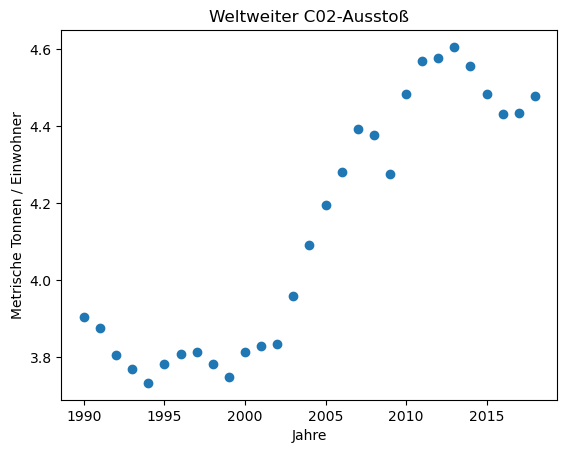

In [2]:
import matplotlib.pylab as plt

jahre = data.index
co2 = data.loc[:, 'Metrische_Tonnen_pro_Einwohner']

plt.figure()
plt.scatter(jahre, co2)
plt.xlabel('Jahre')
plt.ylabel('Metrische Tonnen / Einwohner')
plt.title('Weltweiter C02-Ausstoß');

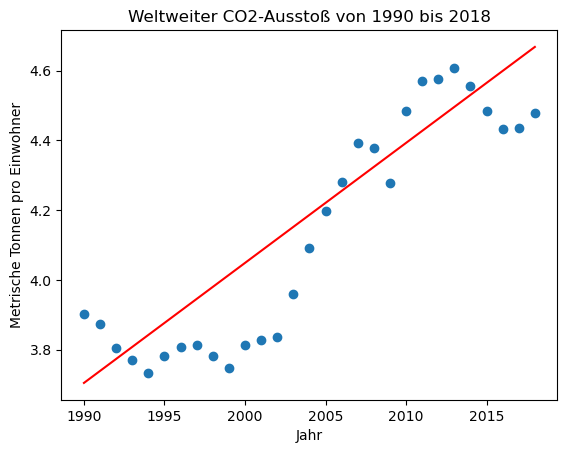

In [3]:
import numpy as np

x_modell = np.linspace(1990, 2018, 100)

m = 0.0344
b = -64.7516
y_modell = m * x_modell + b

plt.figure()
plt.scatter(jahre,co2)
plt.plot(x_modell, y_modell, color='red')
plt.xlabel('Jahr') 
plt.ylabel('Metrische Tonnen pro Einwohner')
plt.title('Weltweiter CO2-Ausstoß von 1990 bis 2018'); 

In [4]:
# blaue y-Koordinaten = Messpunkte
y_blau = co2

# Berechnung der roten y-Koordinaten, indem wir x-Koordinaten der Messpunkte
# in die Modellfunktion y = m*x + b einsetzen
x = jahre
y_rot = 0.0344 * x - 64.7516

# Berechnung Gesamtfehler
N = 29
gesamtfehler = 1/N * np.sum( (y_blau - y_rot)**2 )

print(f'Der Gesamtfehler ist {gesamtfehler}.')

Der Gesamtfehler ist 0.02248906646562731.


In [6]:
y_mittelwert = y_blau.mean()
gesamtfehler_mittelwert = 1/N * np.sum( (y_blau - y_mittelwert)**2 )

print(f'Der Gesamtfehler für den Mittelwert als Schätzung ist {gesamtfehler_mittelwert}.')

Der Gesamtfehler für den Mittelwert als Schätzung ist 0.10170059696116414.


In [8]:
relativer_fehler = gesamtfehler / gesamtfehler_mittelwert

print(f'Der relative Fehler der Modellfunktion im Verhältnis zum Fehler beim Mittelwert ist: {relativer_fehler:.4f}')
print(f'In Prozent umgerechnet ist das: {relativer_fehler * 100:.2f} %.')

Der relative Fehler der Modellfunktion im Verhältnis zum Fehler beim Mittelwert ist: 0.2211
In Prozent umgerechnet ist das: 22.11 %.


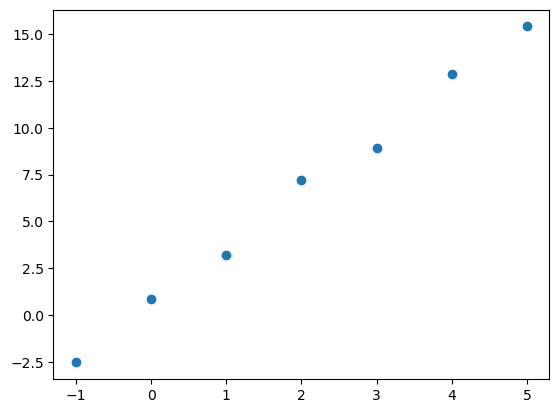

In [4]:
import matplotlib.pylab as plt
import numpy as np

x = np.array([-1, 0, 1, 2,  3, 4, 5])
y = 3 * x + np.random.normal(1, 0.5, 7)

plt.figure()
plt.scatter(x,y)

In [5]:
print(y)

[-2.52870914  0.8535376   3.21519415  7.19909853  8.93231523 12.89687146
 15.40783079]


In [10]:
from numpy.polynomial.polynomial import polyfit

p = polyfit(x, y, 2)
print(p)

[14.7279424   8.09062593 -2.00208073]


In [11]:
a = p[2]
b = p[1]
c = p[0]

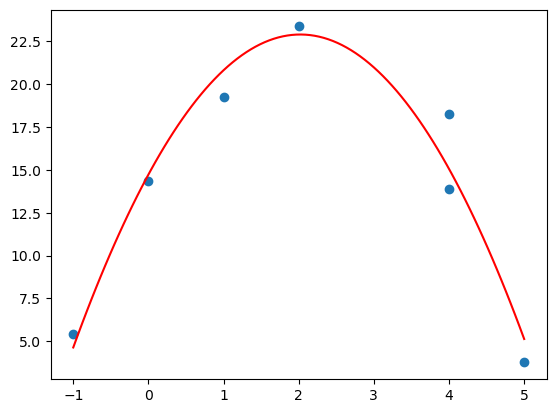

In [13]:
plt.figure();
plt.scatter(x,y);
x_plot = np.linspace(-1, 5, 100);
y_plot = a * x_plot**2 + b * x_plot + c
plt.plot(x_plot, y_plot, color='red');

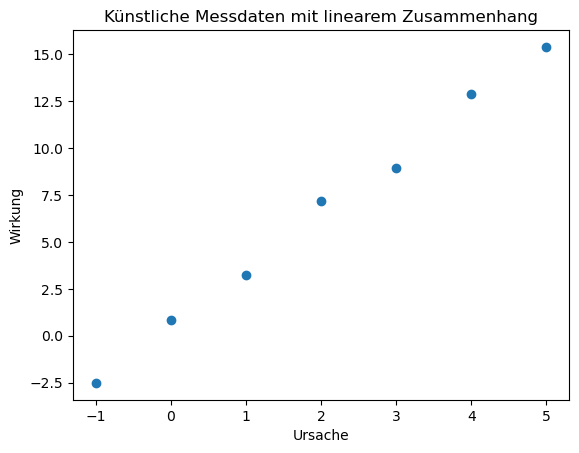

In [1]:
import matplotlib.pylab as plt

x = [-1, 0, 1, 2,  3, 4, 5]
y = [-2.52,  0.85,   3.21,  7.19,  8.93, 12.89, 15.40]

plt.figure()
plt.scatter(x,y)
plt.xlabel('Ursache')
plt.ylabel('Wirkung')
plt.title('Künstliche Messdaten mit linearem Zusammenhang');

In [3]:
import numpy as np

koeffizienten = np.polyfit(x,y, 1)
print(koeffizienten)

[2.98428571 0.59571429]


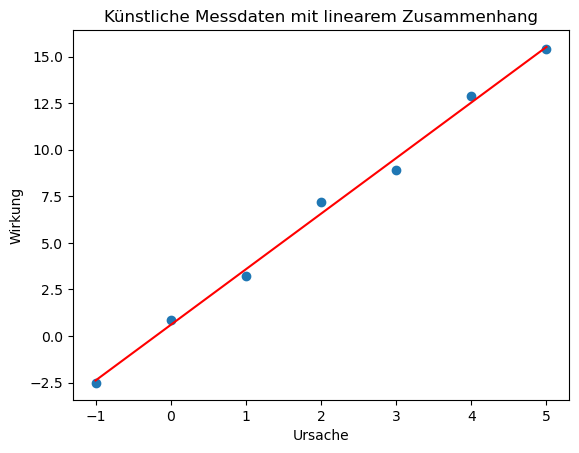

In [4]:
# Wertetabelle für Regressionsgerade
x_modell = np.linspace(-1, 5)
y_modell = np.polyval(koeffizienten, x_modell)

# Visualisierung Messwerte und Regressionsgerade
plt.figure()
plt.scatter(x,y)
plt.plot(x_modell, y_modell, color='red')
plt.xlabel('Ursache')
plt.ylabel('Wirkung')
plt.title('Künstliche Messdaten mit linearem Zusammenhang');



/opt/homebrew/Caskroom/miniconda/base/envs/turtle/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/Caskroom/miniconda/base/envs/turtle/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


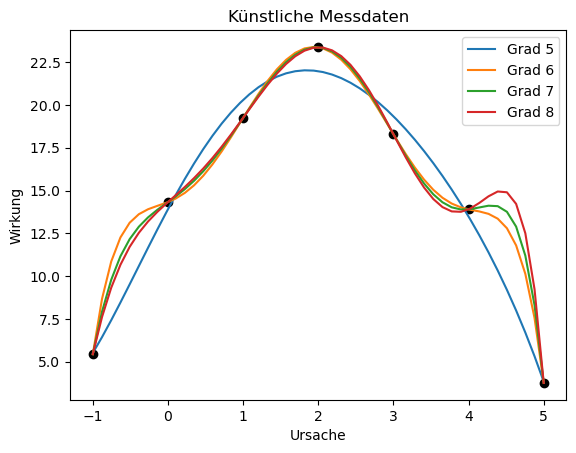

In [5]:
# künstliche Messdaten
x = [-1, 0, 1, 2, 3, 4, 5]
y = [5.4384, 14.3252, 19.2451, 23.3703, 18.2885, 13.8978, 3.7586]

plt.figure()
plt.scatter(x,y, color='black')
plt.xlabel('Ursache')
plt.ylabel('Wirkung')
plt.title('Künstliche Messdaten')

x_plot = np.linspace(-1,5)

for grad in [5, 6, 7, 8]:
  # berechne Regressionspolynom
  p = np.polyfit(x, y, grad)
  y_plot = np.polyval(p, x_plot)
  # visualisiere zusätzlich das Regressionspolynon
  plt.plot(x_plot, y_plot, label=f'Grad {grad}')
plt.legend();

In [7]:
def berechne_r2(y, y_modell):
    N = len(y)
    y_mittelwert = 0
    for messwert in y:
        y_mittelwert = y_mittelwert + messwert
    y_mittelwert = y_mittelwert / N

    zaehler = 0
    nenner = 0
    for i in range(N):
        zaehler = zaehler + (y[i] - y_modell[i])**2
        nenner  = nenner  + (y[i] - y_mittelwert)**2

    r2 = 1 - zaehler / nenner
    return r2

r2_liste = []
for grad in [1,2,3,4,5,6,7,8,9,10]:
    p = np.polyfit(x, y, grad)
    y_modell = np.polyval(p, x)
    r2 = berechne_r2(y, y_modell)
    r2_liste.append(r2)

for i in range(9):
    print(f'Polynomgrad {i+1}: R2 = {r2_liste[i]}')

TypeError: unsupported operand type(s) for -: 'list' and 'float'